In [1]:
import json
import pandas as pd
from collections import Counter
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import random
random.seed = 23

In [2]:
with open('dj.json', encoding="utf-8") as f:
    f = f.read()
    data = json.loads(f)

###### Получаем списки для дата сетов

In [4]:
info = []
s_ns = []
theatres = []
num_performances = []
#num_spectators = []
#genres = []
composition_names = []
for i in data:
    s_n = (i['data']['subject_name'])
    s_ns.append(s_n)
    theatre = (i['data']['theatre_name'])
    theatres.append(theatre)
    num_performance = (i['data']['number_of_performances,_stationary'])
    num_performances.append(num_performance)
    compose_name = (i['data']['composition_name'])
    composition_names.append(compose_name)
    info.append((s_n, theatres, num_performances, composition_names))

### Количество спектаклей в регионах

In [5]:
lala = Counter(s_ns).most_common(21)

In [6]:
df = pd.DataFrame(lala)
df.drop([0,0], inplace=True)

In [7]:
df

,0,1
1,г.Санкт-Петербург,1132
2,Московская обл.,725
3,Свердловская обл.,535
4,Челябинская обл.,520
5,Красноярский край,464
6,Респ. Татарстан,455
7,Нижегородская обл.,445
8,Самарская обл.,438
9,Омская обл.,399
10,Респ. Башкортостан,397


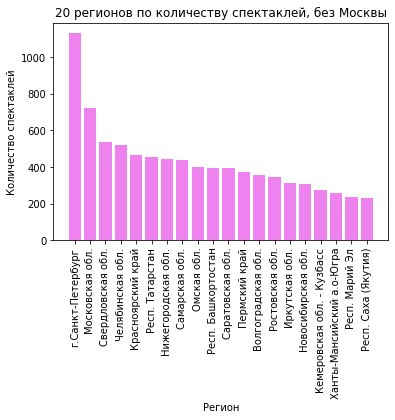

In [8]:
X = df[0]
Y = df[1]
plt.bar(X, Y, color='violet')
#plt.xticks(ticks=X, labels=POS)
plt.title('20 регионов по количеству спектаклей, без Москвы')
plt.ylabel('Количество спектаклей')
plt.xlabel('Регион')
plt.xticks(rotation=90)
plt.show()

### Популярные жанры

In [9]:
c_gs = []
for i in data:
    c_g = (i['data']['composition_genre'])
    c_gs.append(c_g)

In [10]:
c_gs

['Прочие виды и жанры драмтеатра',
 'Комедия',
 'Сказка',
 'Сказка',
 'Сказка',
 'Комедия',
 'Сказка',
 'Драма',
 'Сказка',
 'Комедия',
 'Комедия',
 'Комедия',
 'Сказка',
 'Водевиль',
 'Музыкальная сказка',
 'Сказка',
 'Комедия',
 'Комедия',
 'Сказка',
 'Комедия',
 'Сказка',
 'Комедия',
 'Сказка',
 'Водевиль',
 'Мюзикл',
 'Драма',
 'Сказка',
 'Оперетта',
 'Комедия',
 'Мистерия',
 'Сказка',
 'Мюзикл',
 'Комедия',
 'Комедия',
 'Прочие виды и жанры музыкального театра',
 'Мюзикл',
 'Оперетта',
 'Музыкальная сказка',
 'Сказка',
 'Мюзикл',
 'Театрализованный концерт',
 'Мюзикл',
 'Музыкальная сказка',
 'Музыкальная сказка',
 'Комедия',
 'Сказка',
 'Сказка',
 'Сказка',
 'Сказка',
 'Сказка',
 'Сказка',
 'Инсценировка',
 'Драма',
 'Сказка',
 'Драма',
 'Комедия',
 'Музыкальная драма',
 'Комедия',
 'Инсценировка',
 'Сказка',
 'Балет',
 'Музыкальная сказка',
 'Оперетта',
 'Опера',
 'Музыкальная сказка',
 'Балет',
 'Балет',
 'Опера',
 'Балет',
 'Балет',
 'Комическая опера',
 'Оперетта',
 'Опера',


In [38]:
genrs = Counter(c_gs).most_common(10)

In [39]:
df = pd.DataFrame(genrs)
#df.drop([0,0], inplace=True)

In [40]:
df

,0,1
0,Сказка,6250
1,Комедия,2833
2,Драма,2073
3,Инсценировка,1266
4,Пьеса,679
5,Опера,585
6,Балет,574
7,Музыкальная сказка,562
8,Трагикомедия,495
9,Мюзикл,355


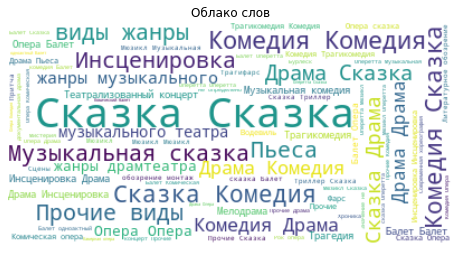

In [41]:
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS
text = ' '.join(c_gs)
#print(text)
cloud = WordCloud(
    background_color ='white',
    #width = 800,
    #height = 800, 
).generate(text)

plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(cloud, interpolation='bilinear')
plt.axis("off") 
plt.title('Облако слов')
plt.show()

(-1.111163328110621,
 1.1005315870528867,
 -1.1019798612618745,
 1.1175941884876386)

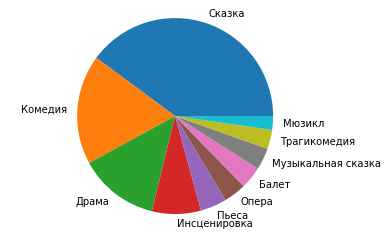

In [14]:
vals = df[1]
labels = df[0]
fig, ax = plt.subplots()
ax.pie(vals, labels=labels)
ax.axis("equal")

### Самые популярные представления

In [15]:
#composition names - названия спектаклей
c_ns = []
for i in data:
    c_n = (i['data']['composition_name'])
    c_ns.append(c_n)

In [16]:
spectacles = Counter(c_ns).most_common(20)

In [17]:
df = pd.DataFrame(spectacles)
df

,0,1
0,Концерт,246
1,Новогоднее представление,228
2,Театрализованное представление,161
3,Золушка,118
4,Кот в сапогах,110
5,Снежная королева,103
6,Морозко,97
7,Дюймовочка,96
8,Аленький цветочек,92
9,Теремок,87


([<matplotlib.patches.Wedge at 0x1c0ce76d160>,
 [Text(1.0226049854274994, 0.4053135129487096, 'Концерт'),
  Text(0.4945724626200673, 0.982546731315067, 'Новогоднее представление'),
  Text(-0.14302114499445656, 1.0906626206506185, 'Театрализованное представление'),
  Text(-0.5827839871549242, 0.932932379283627, 'Золушка'),
  Text(-0.867181070389267, 0.6767547496386896, 'Кот в сапогах'),
  Text(-1.0385102843404, 0.3626243087814462, 'Снежная королева'),
  Text(-1.0995328256514243, 0.03205565964061319, 'Морозко'),
  Text(-1.061048772618794, -0.29013014687231453, 'Дюймовочка'),
  Text(-0.934715944800938, -0.5799190482600912, 'Аленький цветочек'),
  Text(-0.7424578107122135, -0.8116380962673124, 'Теремок'),
  Text(-0.5065925820540639, -0.9764035824431395, 'Золотой цыпленок'),
  Text(-0.24594793215276892, -1.0721518617573618, 'По щучьему велению'),
  Text(0.021934471406666035, -1.0997812868766728, 'Кошкин дом'),
  Text(0.2738203663202918, -1.0653743037018593, 'Гуси-лебеди'),
  Text(0.49758454

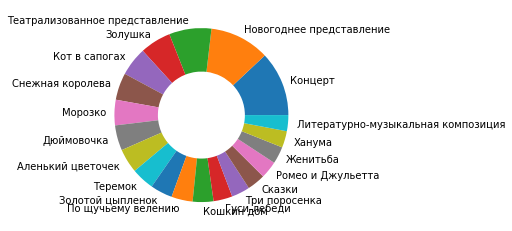

In [18]:
vals = df[1]
labels = df[0]
fig, ax = plt.subplots()
ax.pie(vals, labels=labels, wedgeprops=dict(width=0.5))

### Количество театров в регионах

In [19]:
List = []
for i in data: 
    d = {i['data']['subject_name']:i['data']['theatre_name']}
    if d in List:
        continue
    else:
        List.append(d)

In [20]:
List_2 = []
for d in List:
    List_2.append(list(d.keys())[0])

In [21]:
sb = Counter(List_2).most_common(20)

In [22]:
df = pd.DataFrame(sb)
df

,0,1
0,г.Москва,94
1,г.Санкт-Петербург,35
2,Московская обл.,27
3,Свердловская обл.,17
4,Челябинская обл.,16
5,Респ. Татарстан,15
6,Самарская обл.,15
7,Красноярский край,14
8,Респ. Башкортостан,13
9,Нижегородская обл.,13


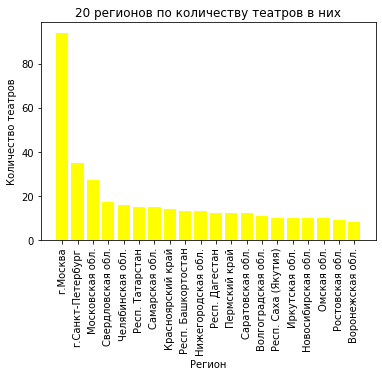

In [23]:
X = df[0]
Y = df[1]
plt.bar(X, Y, color='yellow')
#plt.xticks(ticks=X, labels=POS)
plt.title('20 регионов по количеству театров в них')
plt.ylabel('Количество театров')
plt.xlabel('Регион')
plt.xticks(rotation=90)
plt.show()

### Где больше всего зрителей

In [24]:
#где больше всего зрителей ходят на спектакли
d = {}
for i in data:
    if i['data']['subject_name'] in d.keys():
        d[i['data']['subject_name']] += round(i['data']['number_of_spetators,_total'], 0)
    else:
        d[i['data']['subject_name']] = round(i['data']['number_of_spetators,_total'], 0)

In [25]:
visits = Counter(d).most_common(20)

In [26]:
df = pd.DataFrame(visits)
df

,0,1
0,г.Москва,7957.0
1,г.Санкт-Петербург,4184.0
2,Свердловская обл.,1187.0
3,Московская обл.,1123.0
4,Новосибирская обл.,960.0
5,Респ. Башкортостан,950.0
6,Красноярский край,919.0
7,Респ. Татарстан,913.0
8,Самарская обл.,864.0
9,Пермский край,856.0


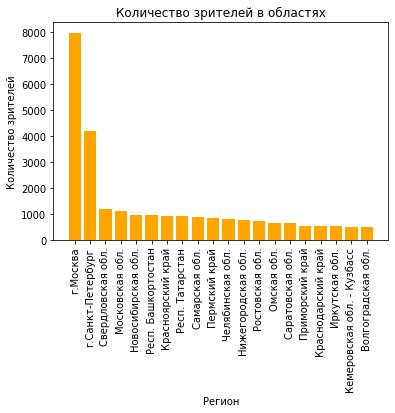

In [27]:
X = df[0]
Y = df[1]
plt.bar(X, Y, color='orange')
plt.title('Количество зрителей в областях')
plt.ylabel('Количество зрителей')
plt.xlabel('Регион')
plt.xticks(rotation=90)
plt.show()

In [ ]:
from IPython.display import Image
Image("img/picture.png")